In [1]:
sc.defaultParallelism

2

In [2]:
df = sqlContext.read.format("org.dianahep.sparkroot").option("tree", "events").load("file:/afs/cern.ch/work/v/vkhriste/public/spark-root-testdata/00E95BAA-C3D7-E611-A416-0025905A60BC.root")

In [3]:
df.printSchema()

root
 |-- triggers_words: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- genReweight_r1f2DW: float (nullable = true)
 |-- genReweight_r1f5DW: float (nullable = true)
 |-- genReweight_r2f1DW: float (nullable = true)
 |-- genReweight_r2f2DW: float (nullable = true)
 |-- genReweight_r5f1DW: float (nullable = true)
 |-- genReweight_r5f5DW: float (nullable = true)
 |-- genReweight_pdfDW: float (nullable = true)
 |-- pfCandidates_size: integer (nullable = true)
 |-- pfCandidates_packedPt: array (nullable = true)
 |    |-- element: short (containsNull = true)
 |-- pfCandidates_packedEta: array (nullable = true)
 |    |-- element: short (containsNull = true)
 |-- pfCandidates_packedPhi: array (nullable = true)
 |    |-- element: short (containsNull = true)
 |-- pfCandidates_packedM: array (nullable = true)
 |    |-- element: short (containsNull = true)
 |-- pfCandidates_packedPuppiW: array (nullable = true)
 |    |-- element: byte (containsNull = true)
 |-- pfCandid

In [4]:
df.count()

32540

In [5]:
df.select("photons_rawPt", "electrons_rawPt", "electrons_eta_").show()

+-------------+---------------+--------------------+
|photons_rawPt|electrons_rawPt|      electrons_eta_|
+-------------+---------------+--------------------+
|           []|             []|                  []|
|           []|             []|                  []|
|           []|             []|[20.826773, 12.55...|
| [-0.9172595]|    [58.993324]|         [58.243607]|
|           []|             []|                  []|
|           []|             []|                  []|
|           []|             []|                  []|
|           []|             []|                  []|
|           []|             []|                  []|
| [-0.8330192]|     [84.51576]|          [83.83172]|
|           []|             []|                  []|
|           []|             []|                  []|
| [0.81634593]|     [52.66939]|          [51.90996]|
|           []|             []|                  []|
|           []|             []|                  []|
|  [1.9695101]|     [12.83439]|         [13.09

In [6]:
from histogrammar import *

In [12]:
rdd = df.select("photons_rawPt").rdd

In [14]:
empty = Bin(100, 0, 100, lambda x: x)
filled = rdd.flatMap(lambda row: row[0]).aggregate(empty, increment, combine)

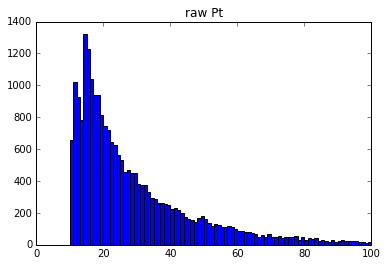

In [15]:
%matplotlib inline
filled.plot.matplotlib(name="raw Pt")

Welcome to JupyROOT 6.09/03


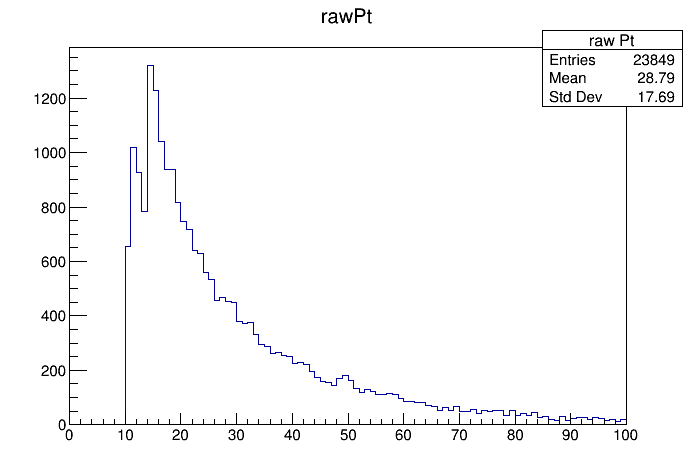

In [16]:
import ROOT
hist = filled.plot.root("raw Pt", "rawPt")
c = ROOT.TCanvas("c")
hist.Draw()
c.Draw()